<h1 style="font-size:80px;color:#6166B3;text-align:center"><strong></strong> <strong style="color:black"> CIFAR-10 Data CNN</strong></h1>

<h1 style="font-size:50px;color:#6166B3"><strong>Importing </strong><strong style="color:black">Necessary Libraries:</strong></h1>

In [1]:
from __future__ import print_function
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
import numpy as np
import os
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('fivethirtyeight')
%matplotlib inline

# Defining the parameters
batch_size = 32
num_classes = 10
epochs=50


<h1 style="font-size:50px;color:#6166B3"><strong>Importing </strong><strong style="color:black">CIFAR-10 Data:</strong></h1>

In [2]:
# Splitting the data between train and test
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


<h1 style="font-size:50px;color:#6166B3"><strong>Visualizing </strong><strong style="color:black">CIFAR-10 Data:</strong></h1>

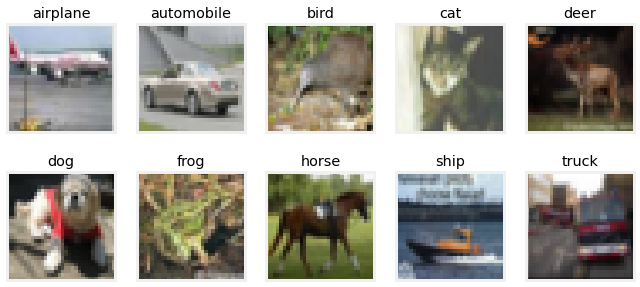

In [3]:
# plotting some random 10 images

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(10,5))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = (features_idx[img_num,::])
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

<h1 style="font-size:50px;color:#6166B3"><strong>Pre-Processing </strong><strong style="color:black">The Data:</strong></h1>

In [4]:
# Convert class vectors to binary class matrices.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

<h1 style="font-size:50px;color:#6166B3"><strong>Designing </strong><strong style="color:black">The Convolution Neural Network:</strong></h1>

In [5]:
# Building the CNN Model (Hidden Output)

model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [6]:
!pip3 install visualkeras

<h1 style="font-size:50px;color:#6166B3"><strong>Visualizing </strong><strong style="color:black">The Convolution Neural Network:</strong></h1>

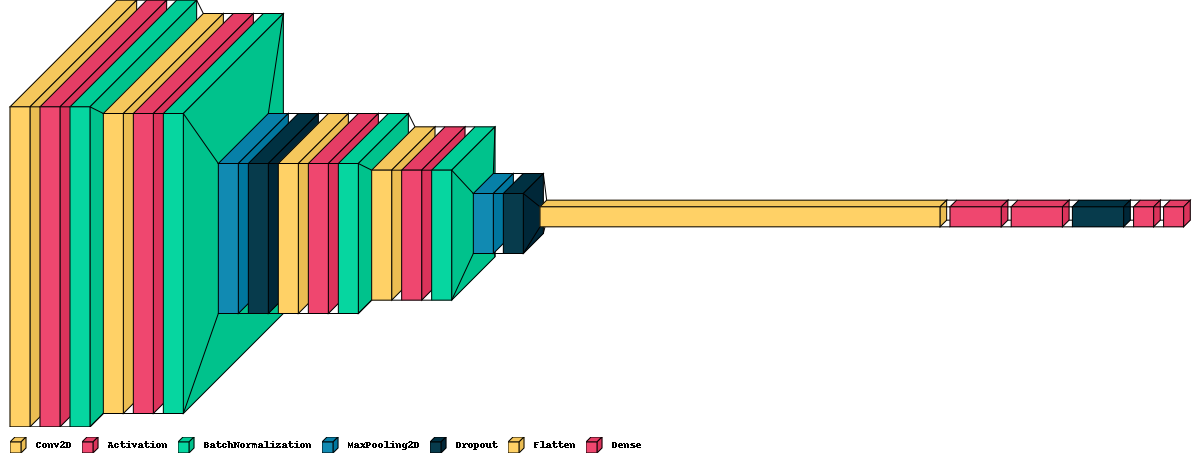

In [7]:
# Visualizing our model (Hidden Input)
import tensorflow as tf
from tensorflow import keras
import visualkeras
visualkeras.layered_view(model, scale_xy=10, legend=True)

<h1 style="font-size:50px;color:#6166B3"><strong>Summary Of </strong><strong style="color:black">The Convolution Neural Network:</strong></h1>

In [8]:
# summary of the model (Hidden Input)
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 30, 30, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 30, 30, 64)       256       
 hNormalization)                                        

<h1 style="font-size:50px;color:#6166B3"><strong>Compiling & Training </strong><strong style="color:black">The Model:</strong></h1>

In [9]:
# compile (Hidden Output)
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the input image
x_train /= 255
x_test /= 255

epochs=50

# Training the model
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 46s 27ms/step - loss: 8.5152 - accuracy: 0.4244 - val_loss: 6.3143 - val_accuracy: 0.5269
Epoch 2/50
1563/1563 [==============================] - 39s 25ms/step - loss: 4.9451 - accuracy: 0.5715 - val_loss: 4.1686 - val_accuracy: 0.5214
Epoch 3/50
1563/1563 [==============================] - 40s 25ms/step - loss: 3.0827 - accuracy: 0.6419 - val_loss: 2.4279 - val_accuracy: 0.6818
Epoch 4/50
1563/1563 [==============================] - 39s 25ms/step - loss: 2.0692 - accuracy: 0.6922 - val_loss: 1.8252 - val_accuracy: 0.6806
Epoch 5/50
1563/1563 [==============================] - 39s 25ms/step - loss: 1.5256 - accuracy: 0.7198 - val_loss: 1.3430 - val_accuracy: 0.7324
Epoch 6/50
1563/1563 [==============================] - 39s 25ms/step - loss: 1.2248 - accuracy: 0.7447 - val_loss: 1.1318 - val_accuracy: 0.7493
Epoch 7/50
1563/1563 [==============================] - 39s 25ms/step - loss: 1.0533 - accuracy: 0.7641 - val_loss: 1.0207 -

<h1 style="font-size:50px;color:#6166B3"><strong>Evaluating </strong><strong style="color:black">The Model:</strong></h1>

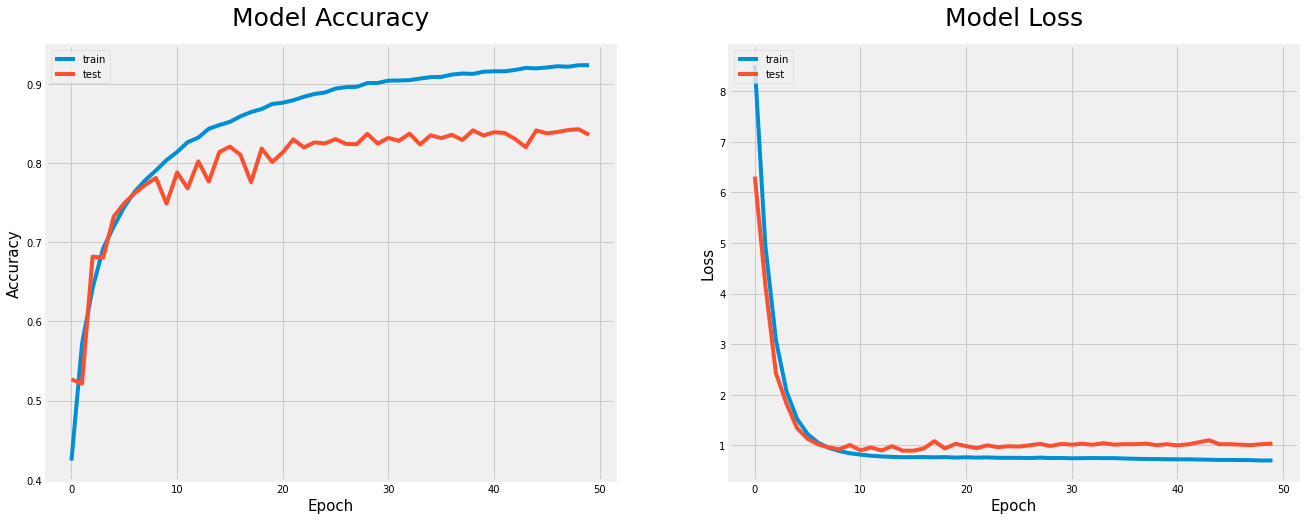

In [10]:
# Plotting the Model Accuracy & Model Loss vs Epochs (Hidden Input)
plt.figure(figsize=[20,8])

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h1 style="font-size:50px;color:#6166B3"><strong>Predictions </strong><strong style="color:black">Using The CNN Model:</strong></h1>

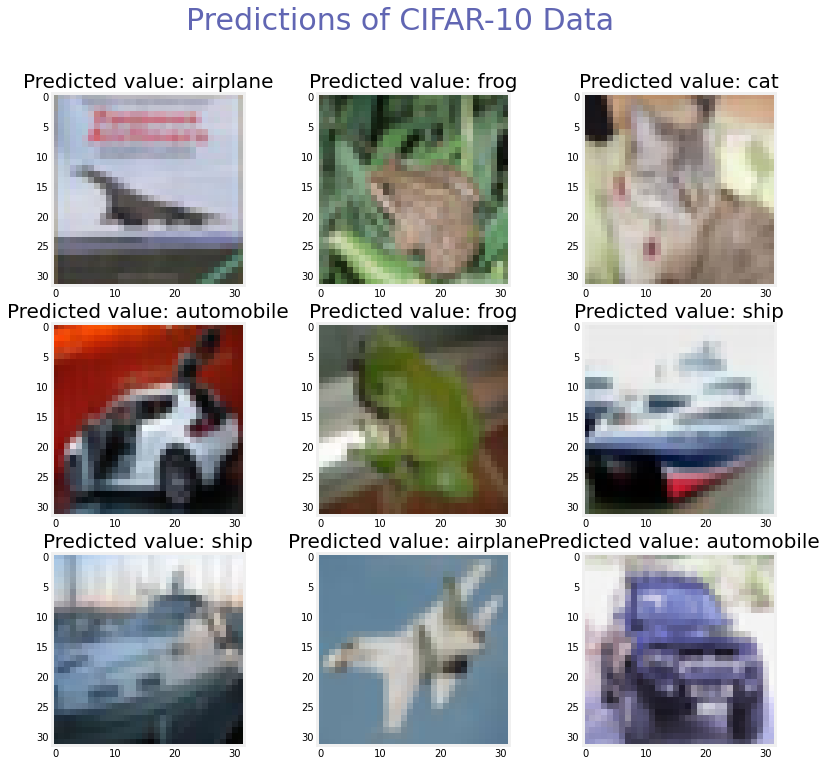

In [11]:
# Checking the predictions! (Hidden Input)
predictions = model.predict(x_test)

plt.figure(figsize=[12,12])

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.subplot(3,3,1)
n = 3
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(3,3,2)
n = 4
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(3,3,3)
n = 8
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(3,3,4)
n = 6
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(3,3,5)
n = 7
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(3,3,6)
n = 1
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(3,3,7)
n = 2
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(3,3,8)
n = 10
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(3,3,9)
n = 9
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.suptitle("Predictions of CIFAR-10 Data", size=30, color="#6166B3")

plt.show()